In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
A = np.array([1,2,3])
print(A**2)

[1 4 9]


In [5]:
Pi = np.arccos(-1)
ell=100
Rleft = np.array([0.,0.,0.])
Rright = np.array([np.sqrt(ell/2),0.,0.])
get_square_diff = lambda r1,r2 : np.sum((r1-r2)**2)
unbound_term = 1.5 * get_square_diff(Rleft, Rright) / ell
def transition_rate(Rleft,Rright,R,unbound_term,li):
    return np.exp(1.5 * np.log(3 * ell / (2 * Pi * li * (ell - li))) - 
    1.5 * (get_square_diff(Rleft, R) / li + get_square_diff(R, Rright) / (ell - li)) + unbound_term)
def transition_rate_l(li):
    # integrate the transition rate over all the space in between the two linkers
    # 
    #space = np.array([[x,y,z] for x in np.linspace(0,np.sqrt(ell/2),100) for y in np.linspace(-np.sqrt(ell/2),np.sqrt(ell/2),100) for z in )])
    res = 0
    dV = np.sqrt(ell/2)/100* 2* np.sqrt(ell/2)/100 *2* np.sqrt(ell/2)/100
    for x in np.linspace(0,np.sqrt(ell/2),100,endpoint=False):
        for y in np.linspace(-np.sqrt(ell/2),np.sqrt(ell/2),100,endpoint=False):
            for z in np.linspace(-np.sqrt(ell/2),np.sqrt(ell/2),100,endpoint=False):
                res += transition_rate(Rleft,Rright,np.array([x,y,z]),unbound_term,li)
    return res

/tmp/ipykernel_22401/641853286.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp(1.5 * np.log(3 * ell / (2 * Pi * li * (ell - li))) -
/tmp/ipykernel_22401/641853286.py:9: RuntimeWarning: divide by zero encountered in true_divide
  1.5 * (get_square_diff(Rleft, R) / li + get_square_diff(R, Rright) / (ell - li)) + unbound_term)
/tmp/ipykernel_22401/641853286.py:8: RuntimeWarning: invalid value encountered in subtract
  return np.exp(1.5 * np.log(3 * ell / (2 * Pi * li * (ell - li))) -
/tmp/ipykernel_22401/641853286.py:9: RuntimeWarning: invalid value encountered in true_divide
  1.5 * (get_square_diff(Rleft, R) / li + get_square_diff(R, Rright) / (ell - li)) + unbound_term)


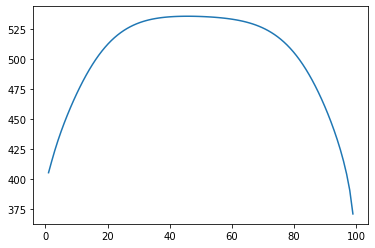

In [49]:
X = np.linspace(0,ell,100)
plt.plot(X,transition_rate_l(X))

# redo the computation

In [6]:
def Omega(r1mr2,l):
    return (3/(2*Pi*l))**1.5*np.exp(-3/2*(np.linalg.norm(r1mr2)**2/l))
def Pmeet(Rleft,Rright,r,l,L):
    return np.exp(np.log(Omega(Rleft-r,l))+np.log(Omega(r-Rright,L-l))-np.log(Omega(Rleft-Rright,L)))
def Pmeet(Rleft,Rright,r,l,L):
    return (3/(2*Pi)*L/(l*(L-l)))**1.5 * np.exp(-1.5*(np.linalg.norm(Rleft-r)**2/l+np.linalg.norm(Rright-r)**2/(L-l)-np.linalg.norm(Rright-Rleft)**2/L))
    np.exp(1.5 * np.log(3 * ell / (2 * Pi * li * (ell - li))) - 
    1.5 * (get_square_diff(Rleft, R) / li + get_square_diff(R, Rright) / (ell - li)) + unbound_term)
def PmeetReduced(r,l):
    L = 100
    Rleft = np.array([0.,0.,0.])
    Rright = np.array([7.,0.,0.])
    return Pmeet(Rleft,Rright,r,l,L)
def PmeetAlong(l):
    L=100
    Rleft = np.array([0.,0.,0.])
    Rright = np.array([7.,0.,0.])
    res = 0.
    #for x in np.linspace(-L/2,7.+L/2,100):
        #for y in np.linspace(-L/2,L/2,100):
            #for z in np.linspace(-L/2,L/2,100):
    for x in np.linspace(-np.sqrt(ell/2),np.sqrt(ell/2),100,endpoint=False):
        #for y in np.linspace(-np.sqrt(ell/2),np.sqrt(ell/2),100,endpoint=False):
            #for z in np.linspace(-np.sqrt(ell/2),np.sqrt(ell/2),100,endpoint=False):
        res += Pmeet(Rleft,Rright,np.array([x,0,0]),l,L)
    return res

In [8]:
X = np.linspace(0,100,100)
PL = PmeetAlong(X)

/tmp/ipykernel_21906/2658774190.py:6: RuntimeWarning: divide by zero encountered in true_divide
  return (3/(2*Pi)*L/(l*(L-l)))**1.5 * np.exp(-1.5*(np.linalg.norm(Rleft-r)**2/l+np.linalg.norm(Rright-r)**2/(L-l)-np.linalg.norm(Rright-Rleft)**2/L))
/tmp/ipykernel_21906/2658774190.py:6: RuntimeWarning: invalid value encountered in multiply
  return (3/(2*Pi)*L/(l*(L-l)))**1.5 * np.exp(-1.5*(np.linalg.norm(Rleft-r)**2/l+np.linalg.norm(Rright-r)**2/(L-l)-np.linalg.norm(Rright-Rleft)**2/L))
/tmp/ipykernel_21906/2658774190.py:6: RuntimeWarning: invalid value encountered in true_divide
  return (3/(2*Pi)*L/(l*(L-l)))**1.5 * np.exp(-1.5*(np.linalg.norm(Rleft-r)**2/l+np.linalg.norm(Rright-r)**2/(L-l)-np.linalg.norm(Rright-Rleft)**2/L))


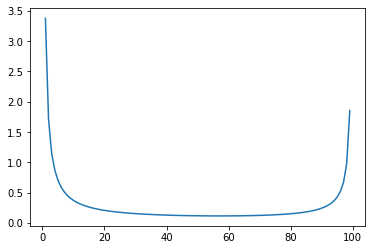

In [9]:
plt.plot(X,PL)